# Ciencia de Datos en Multinacional de Supermercados
### Maximum likelihood estimation
### Pablo Alberto Ramos Roldan

Se nos otorga un conjunto de datos donde encontramos los elementos “sales” y “ratings”, con el cual podremos atisbar el comportamiento de un segmento de población para considerar establecer un mercado en un cierto lugar. Para ello, utilizaremos el método de MLE(Maximum likelihood estimation) y ajustaremos parámetros como gastos, mantenimiento, empleados etc, para saber qué comportamiento de una población se necesita para que el mercado sea viable. 

Comenzamos con las herramientas que se van a utilizar para realizar el análisis. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta
from scipy.stats import norm
from scipy.optimize import fsolve

print("Librerias listas.")

Librerias listas.


Una vez importados y leídos los datos, nos aseguramos de arreglarlos y convertirlos al valor que vamos a usar(pesos). Posteriormente se calcula el valor máximo y mínimo de ventas para ser normalizado. Normaliza los datos de ventas a un rango entre 0 y 1 usando la fórmula de normalización (valor - mínimo) / (máximo - mínimo). Esto se hace para ajustar los datos y facilitar el análisis estadístico posterior y obtener los valores de alpha y beta que describen la distribución. 

In [26]:
df = pd.read_csv("SuperMarketData.csv")
# Primeras 5 lineas del conjunto de datos.
print(df.head())

sales = np.array(df["Sales"]) * 19.88

max_sales = max(sales)
min_sales = min(sales)
sales_norm = (1 / (max_sales - min_sales)) * (sales - min_sales)
a, b, _, _ = beta.fit(sales)

print(a, b)

      Sales  Rating
0  548.9715     9.1
1   80.2200     9.6
2  340.5255     7.4
3  489.0480     8.4
4  634.3785     5.3
1.034337826112367 2.9124357466069815


El siguiente paso es calcular los parámetros de la distribución como la media y varianza normalizadas para analizar la distribución ajustada y entender la forma en que se distribuyen las ventas.

In [27]:
mu_norm = a / (a + b)
var_norm = (a * b) / ((a + b) ** 2 * (a + b + 1))
desv_norm = np.sqrt(var_norm)
mu = mu_norm * (max_sales - min_sales) + min_sales
var = (max_sales - min_sales) ** 2 * var_norm
sigma = np.sqrt(var)
print(f"MU:{mu}", f"Sigma:{sigma}")

MU:5588.845889019187 Sigma:4056.3949757404985


Ahora tomamos en cuenta cuales van a ser los gastos que se tienen que cubrir como salarios, nóminas, días trabajados, luz, etc. De igual manera, incorporamos el objetivo al que queremos llegar que es 1.5 millones de pesos. 

In [31]:
fact = 1.15

sal_cajeros = 300
num_cajeros = 30
dias_t = 24
tot_sal_caj = sal_cajeros * num_cajeros * dias_t * fact

sal_conserjes = 5000
num_conserjes = 20
tot_sal_conserjes = sal_conserjes * num_conserjes * fact

gerente = 100000

sub_gerentes = 45000
num_subgerentes = 4
tot_sal_sub = sub_gerentes * num_subgerentes

sal_almacenista = 300
num_almacenista = 40
tot_sal_alm = sal_almacenista * num_almacenista * dias_t * fact

g_pasillo = 300
num_pasillos = 40
tot_pasillo = g_pasillo * num_pasillos * fact

nomina_tot = tot_sal_caj + tot_sal_conserjes + tot_sal_sub + gerente + tot_sal_sub + tot_sal_alm + tot_pasillo


gasto_luz = 120 * 2000 * 12 * 2.3

gastos_tot = gasto_luz + nomina_tot
ingreso = gastos_tot + 1500000

print(f"Gastos Totales: {gastos_tot} \nIngreso: {ingreso}")

Gastos Totales: 7792399.999999999 
Ingreso: 9292400.0


Ahora definimos una función que modela una ecuación basada en la estimación de ingresos del supermercado y utiliza la distribución normal para calcular un valor crítico (Z) que representa el percentil 99%. Establecemos un valor entrenado para que sea el punto de partida de la función “fsolve” para posteriormente encontrar el valor de N que hace que la función “equation” sea cero, lo cual corresponde al número estimado de visitantes necesarios para alcanzar el ingreso deseado. Los pasos finales son calcular la población objetivo que tiene que visitar el supermercado y su porcentaje. Por último, esto nos permitirá  evaluar la viabilidad de establecer el supermercado en la ubicación analizada.

In [32]:
def equation(N):
    Z = norm.ppf(0.99)
    return (mu * N + Z * sigma * np.sqrt(N)) ** 2 - ingreso ** 2

valor_entrenado = ingreso / mu
print("Valor entrenado:", valor_entrenado)

N = fsolve(equation, valor_entrenado)
print("Ventas estimadas:", N[0])

poblacion = N / 4
porcentaje_poblacion = poblacion / 40000
print(f"Porcentaje de la población que debe visitar el supermercado: {porcentaje_poblacion[0]}")

Valor entrenado: 1662.668855882653
Ventas estimadas: 1595.2308788796722
Porcentaje de la población que debe visitar el supermercado: 0.009970192992997952


El siguiente paso es analizar los ratings y observar qué distribución se modela de cada una de las ventas proporcionadas por los clientes. De igual manera buscaremos cuál es la probabilidad de que obtengamos un rating de 8.5 de abrir un supermercado. 


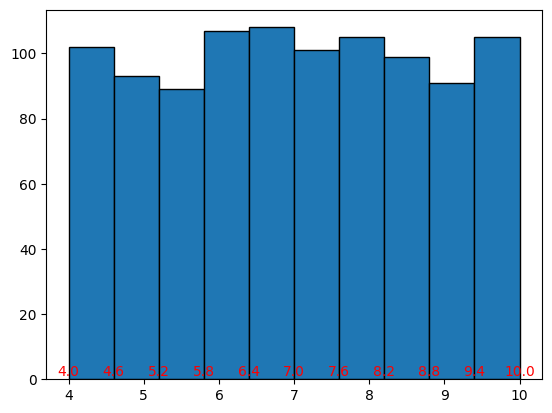

In [33]:
ratings = np.array(df['Rating'])
n, bins, patches = plt.hist(ratings, edgecolor="black")
for num in bins:
  plt.text(num, 1, round(num, 2), ha='center', color='red')

Observamos que la distribución no tiene una tendencia favorable hacia ninguno de los valores de ratings, ya que se tiene una cantidad muy similar de clientes en cada uno de los valores del 4 al 10. Esto nos dice que el servicio es inconsistente al punto que nunca se tiene un nivel bueno constante o ningún nivel malo constante.

Para calcular la probabilidad de obtener un rating de 8.5 seguimos un camino similar al del cálculo sobre poner un supermercado o no. empezamos con normalizar los valores de calificación entre 0 y 1, y se ajusta una distribución beta a estos datos para analizar cómo se distribuyen las calificaciones. Posteriormente se calcula la media y desviación estándar en la escala original para facilitar su observación. 

Valor de MU: 6.839149802099823
Valor de Sigma: 1.7634306205368828


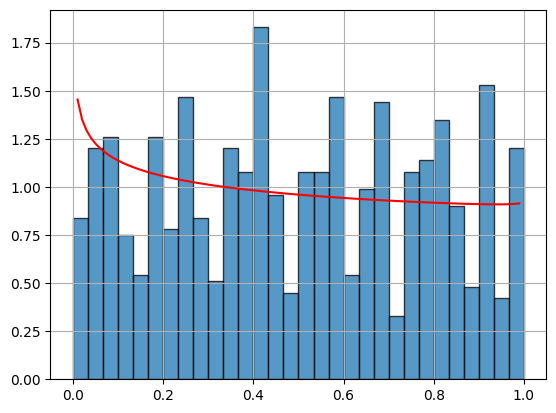

In [34]:
max_ratings = max(ratings)
min_ratings = min(ratings)
ratings_norm = (1/(max_ratings - min_ratings)) * (ratings - min_ratings)
a,b,_,_=beta.fit(ratings)
mu_norm = a / (a + b)
var_norm = (a * b) / ((a + b) ** 2 * (a+b+1))
desv_norm = np.sqrt(var_norm)
mu = mu_norm * (max_ratings - min_ratings) + min_ratings
var = (max_ratings - min_ratings) ** 2 * var_norm
sigma = np.sqrt(var)

print(f"Valor de MU: {mu}\nValor de Sigma: {sigma}")

n, bins, patches = plt.hist(ratings_norm, bins=30, density=True, alpha=0.75, edgecolor="black", label='Histograma de Ratings Normalizados')
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a, b)
plt.plot(x, y, 'r-', label='Distribución Beta ajustada')
plt.grid(True)
plt.show()

Lo que nos dice esta gráfica es un histograma de los ratings normalizados junto con la distribución beta ajustada para comparar visualmente los datos. 


Por ultimo, se calcula la probabilidad de que la media de los ratings sea al menos 8.5, lo cual ayuda a evaluar la satisfacción esperada de los clientes.

In [35]:
prob = 1 - norm.cdf(8.5, mu, sigma)
print(f"Probabilidad de al menos obtener un rating de 8.5: {prob}") 

Probabilidad de al menos obtener un rating de 8.5: 0.17314008309421802


Notemos que la probabilidad es de 17%, lo cual es una probabilidad muy baja considerando que tenemos que cuidar la lealtad de los clientes si hay competencia en donde se posicionaría el supermercado. Esto es de suma importancia ya que se busca que nuestro supermercado resalte sobre los demás y requiere de cambios drásticos en el área de atención al cliente. 